In [1]:
%%writefile load.py
from __future__ import  division
import numpy as np
import scipy as sp
%matplotlib inline
from matplotlib import pyplot as plt

Overwriting load.py


In [2]:
# %load load.py
from __future__ import  division
import numpy as np
import scipy as sp
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
ls

load.py       test.ipynb
pbrain.py     write_npy.py


In [4]:
cd ..

/Users/mac/spcup


In [5]:
ls

data/         mat/
feature_data/ py/
info/


In [6]:
cd feature_data/

/Users/mac/spcup/feature_data


In [7]:
ls

A/ B/ C/ D/ E/ F/ G/ H/


In [8]:
ls A

A_P1.mat  A_P4.mat  A_P7.mat
A_P2.mat  A_P5.mat  A_P8.mat
A_P3.mat  A_P6.mat  A_P9.mat


In [9]:
import scipy.io

In [10]:
data_A1 = scipy.io.loadmat('A/A_P1.mat') 

In [11]:
data_A1

{'F': array([[ 59.93061044,  60.53041577,  61.21050485, ...,  60.03051455,
          60.02526403,  60.02813263]]),
 '__globals__': [],
 '__header__': 'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Oct 15 09:39:55 2015',
 '__version__': '1.0',
 'diff_x': array([[  2.08128365e+00,   6.71300614e-03,   6.15150350e-03,
           6.74543239e-03,   6.27030935e-03,   7.20487538e-03,
           4.95221218e-03,   5.76411045e-03,   7.30461417e-03,
           7.55825842e-03,   6.75862020e-03,   5.30973177e-03,
           6.13051034e-03,   7.29875835e-03,   7.77331666e-03,
           5.48169202e-03,   4.99945208e-03,   1.13294217e-02,
           9.53782627e-03,   8.38541924e-03,   8.06206053e-03,
           5.97998835e-03,   7.86380486e-03,   8.72990758e-03,
           6.64856360e-03,   6.96757169e-03,   7.17781411e-03,
           7.33968289e-03,   6.85719741e-03,   7.01521597e-03,
           6.31170113e-03,   6.29047292e-03,   6.85366465e-03,
           6.13771163e-03,   6.13048418e-03, 

In [19]:
len(data_A1['diff_x'][0])

281

In [16]:
ls

A/ B/ C/ D/ E/ F/ G/ H/


In [17]:
mkdir tmp

In [18]:
ls

A/   C/   E/   G/   tmp/
B/   D/   F/   H/


In [22]:
a=[1,2,3]
b = [1,4,9]
c = [1,8,27]

In [23]:
zip(a,b,c)

[(1, 1, 1), (2, 4, 8), (3, 9, 27)]

In [28]:
chr(3+ord('A'))

'D'

In [29]:
ls

A/   C/   E/   G/   tmp/
B/   D/   F/   H/


In [30]:
cd ..

/Users/mac/spcup


In [31]:
ls

data/         mat/
feature_data/ py/
info/


In [32]:
cd py

/Users/mac/spcup/py


In [33]:
ls

load.py       test.ipynb
pbrain.py     write_npy.py


In [60]:
import re
f_name = []
for i in data_A1:
    if not re.match(r'__*',i) and i!='F' :
        if not re.match(r'global*',i):
            f_name.append(i)
            

In [35]:
a = '__vv__'

In [36]:
import re

In [43]:
re.match('__*',a)

In [57]:
data_A1

{'F': array([[ 59.93061044,  60.53041577,  61.21050485, ...,  60.03051455,
          60.02526403,  60.02813263]]),
 '__globals__': [],
 '__header__': 'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Oct 15 09:39:55 2015',
 '__version__': '1.0',
 'diff_x': array([[  2.08128365e+00,   6.71300614e-03,   6.15150350e-03,
           6.74543239e-03,   6.27030935e-03,   7.20487538e-03,
           4.95221218e-03,   5.76411045e-03,   7.30461417e-03,
           7.55825842e-03,   6.75862020e-03,   5.30973177e-03,
           6.13051034e-03,   7.29875835e-03,   7.77331666e-03,
           5.48169202e-03,   4.99945208e-03,   1.13294217e-02,
           9.53782627e-03,   8.38541924e-03,   8.06206053e-03,
           5.97998835e-03,   7.86380486e-03,   8.72990758e-03,
           6.64856360e-03,   6.96757169e-03,   7.17781411e-03,
           7.33968289e-03,   6.85719741e-03,   7.01521597e-03,
           6.31170113e-03,   6.29047292e-03,   6.85366465e-03,
           6.13771163e-03,   6.13048418e-03, 

In [58]:
zip([1,2,3],[4])

[(1, 4)]

In [61]:
f_name

['skew_x', 'wavcoef_n', 'diff_x', 'kurt_x', 'mean_x', 'var_x']

In [64]:
x = [ data_A1[i][0] for i in f_name ]

In [65]:
len(x)

6

In [70]:
a=zip(*[ data_A1[i][0] for i in f_name ])

In [71]:
len(a)

281

In [111]:
# %load write_npy.py
##
#   load .mat files and write the contens to a 
#   .npz file.
#   the files has two fields - 'inputs' and 'targets'  
#   'inputs' is a numpy array of tuples
#   'targets' is from 0 to 7 (for grid 'A' to 'H')

import scipy.io
import numpy as np

inputs = []
targets = []

def loadMat(file):
    '''
     load matfile named 'file' ..
    '''
    return scipy.io.loadmat(file)

def load_local_features(data):
    ''' load local features from data '''
    feature_name = []

    # extract the local feature name
    for i in data:
        if not re.match(r'__*',i) and i!='F' :
            if not re.match(r'global*',i):
                feature_name.append(i)

    inputs.extend(zip( 
            *[ data[i][0] for i in feature_name ]
         ))

    targets.extend([0 for i in xrange(len(inputs))])





 

In [112]:
file = '../feature_data/matfile/A/A_P1.mat'

In [113]:
data = loadMat(file)

In [114]:
load_local_features(data)

In [115]:
len(inputs)

281

In [116]:
inputs[0]

(3.486627213923958,
 21.993110076534109,
 2.0812836486775907,
 14.46856641323966,
 60.108116984777837,
 0.15589071340541458)

In [117]:
len(inputs)

281

In [118]:
len(targets)

281

In [119]:
a=[1 2 3]

SyntaxError: invalid syntax (<ipython-input-119-7f0dbc2253fc>, line 1)

In [122]:
'{0},{0}'.format('qwe',4)

'qwe,qwe'

In [123]:
file

'../feature_data/matfile/A/A_P1.mat'

In [124]:
import os

In [125]:
os.path.exists(file)

True

In [127]:
# %load write_npy.py
##
#   load .mat files and write the contens to a 
#   .npz file.
#   the files has two fields - 'inputs' and 'targets'  
#   'inputs' is a numpy array of tuples
#   'targets' is from 0 to 7 (for grid 'A' to 'H')

import scipy.io
import numpy as np
import os.path
import re

inputs = []
targets = []

def loadMat(file):
    '''
     load matfile named 'file' ..
    '''
    return scipy.io.loadmat(file)

def load_local_features(data):
    ''' load local features from data '''
    feature_name = []

    # extract the local feature name
    for i in data:
        if not re.match(r'__*',i) and i!='F' :
            if not re.match(r'global*',i):
                feature_name.append(i)
    inputs.extend(
        zip( *[ data[i][0] for i in feature_name ])
    )

    targets.extend( [0 for i in xrange(len(inputs))] )


def main():
    grids = ['A','B','C','D','E','F','G','H'];

    for grid in grids:
        for i in xrange(1,12):
            filename = '../feature_data/matfile/{0}/{0}_P{1}.mat'\
            .format(grid,i)
            if os.path.exists(filename):
                load_local_features(
                    loadMat(filename)
                )

if __name__ == '__main__':
    main()






 

In [130]:
main()

In [131]:
len(inputs)

69126

In [132]:
len(targets)

8537061

In [133]:
ord('A')-''

65

In [167]:
# %load write_npy.py
##
#   load .mat files and write the contens to a 
#   .npz file.
#   the files has two fields - 'inputs' and 'targets'  
#   'inputs' is a numpy array of tuples
#   'targets' is from 0 to 7 (for grid 'A' to 'H')

import scipy.io
import numpy as np
import os.path
import re

inputs = []
targets = []

def loadMat(file):
    '''
     load matfile named 'file' ..
    '''
    return scipy.io.loadmat(file)

def load_local_features(data,target_value):
    ''' load local features from data '''
    feature_name = []

    # extract the local feature name
    for i in data:
        if not re.match(r'__*',i) and i!='F' :
            if not re.match(r'global*',i):
                feature_name.append(i)
                #print '#1'
    input  = zip( *[ data[i][0] for i in feature_name ])
    #print input

    target =  [target_value for i in xrange(len(input))] 

    inputs.extend(input)
    targets.extend(target)
    


def main():
    grids = ['A','B','C','D','E','F','G','H'];

    for grid in grids:
        for i in xrange(1,12):
            filename = '../feature_data/matfile/{0}/{0}_P{1}.mat'\
            .format(grid,i)
            if os.path.exists(filename):
                load_local_features(
                    loadMat(filename), ord(grid)-ord('A')
                )

if __name__ == '__main__':
    main()






 

In [168]:
main()

In [169]:
filename = '../feature_data/matfile/{0}/{0}_P{1}.mat'\
            .format('A',1)

In [170]:
data = loadMat(filename)

In [171]:
inputs

[(3.486627213923958,
  21.993110076534109,
  2.0812836486775907,
  14.46856641323966,
  60.108116984777837,
  0.15589071340541458),
 (0.22104385500985299,
  21.96036177677469,
  0.0067130061421138976,
  2.4416242504918921,
  60.018614471211471,
  1.9842047264507494e-05),
 (0.23794538327852713,
  21.9640971226675,
  0.006151503498671218,
  2.8392031337408548,
  60.028823332401274,
  7.880600393474975e-06),
 (-0.26886402766499323,
  21.960659134996586,
  0.0067454323879800882,
  2.3260618433854079,
  60.019427164037822,
  1.9558798742116676e-05),
 (-0.15994364766022284,
  21.955169702984239,
  0.0062703093515210639,
  1.9957717167343092,
  60.0044243099426,
  1.9162979597266972e-05),
 (0.34160455048360544,
  21.952649107635715,
  0.0072048753792799403,
  2.1914498993980316,
  59.997535414304245,
  4.2785544788021015e-06),
 (0.21449328542373303,
  21.953324055747821,
  0.0049522121816352183,
  1.8325998842407651,
  59.999380076561643,
  5.8514967681690931e-06),
 (0.25239433442743014,
  21

In [172]:
load_local_features(data,0)

In [173]:
inputs

[(3.486627213923958,
  21.993110076534109,
  2.0812836486775907,
  14.46856641323966,
  60.108116984777837,
  0.15589071340541458),
 (0.22104385500985299,
  21.96036177677469,
  0.0067130061421138976,
  2.4416242504918921,
  60.018614471211471,
  1.9842047264507494e-05),
 (0.23794538327852713,
  21.9640971226675,
  0.006151503498671218,
  2.8392031337408548,
  60.028823332401274,
  7.880600393474975e-06),
 (-0.26886402766499323,
  21.960659134996586,
  0.0067454323879800882,
  2.3260618433854079,
  60.019427164037822,
  1.9558798742116676e-05),
 (-0.15994364766022284,
  21.955169702984239,
  0.0062703093515210639,
  1.9957717167343092,
  60.0044243099426,
  1.9162979597266972e-05),
 (0.34160455048360544,
  21.952649107635715,
  0.0072048753792799403,
  2.1914498993980316,
  59.997535414304245,
  4.2785544788021015e-06),
 (0.21449328542373303,
  21.953324055747821,
  0.0049522121816352183,
  1.8325998842407651,
  59.999380076561643,
  5.8514967681690931e-06),
 (0.25239433442743014,
  21

In [174]:
len(inputs)

46365

In [175]:
len(targets)

46365

In [176]:
np.savez_compressed?

In [177]:
ls

features.npz  test.ipynb
load.py       write_npy.py
pbrain.py


In [178]:
cd ..

/Users/mac/spcup


In [179]:
ls

data/         mat/
feature_data/ py/
info/


In [183]:
ls feature_data/pyfile

features.npz


In [184]:
ls

data/         mat/
feature_data/ py/
info/


In [194]:
file = 'feature_data/pyfile/features.mat'

In [195]:
dat = np.load(file)

In [196]:
dat

In [197]:
dat['inputs']

KeyError: 'inputs is not a file in the archive'

In [192]:
len(dat['arr_1'])

23042

In [193]:
len(inputs)

46365

In [199]:
inputs[:3]

[(3.486627213923958,
  21.993110076534109,
  2.0812836486775907,
  14.46856641323966,
  60.108116984777837,
  0.15589071340541458),
 (0.22104385500985299,
  21.96036177677469,
  0.0067130061421138976,
  2.4416242504918921,
  60.018614471211471,
  1.9842047264507494e-05),
 (0.23794538327852713,
  21.9640971226675,
  0.006151503498671218,
  2.8392031337408548,
  60.028823332401274,
  7.880600393474975e-06)]

In [200]:
dat['arr_1'][:3]

array([0, 0, 0])

In [201]:
scipy.io.savemat?

In [202]:
file = 'feature_data/pyfile/features.mat'

In [203]:
dat = scipy.io.loadmat(file)

In [205]:
dat['inputs']

array([[  3.48662721e+00,   2.19931101e+01,   2.08128365e+00,
          1.44685664e+01,   6.01081170e+01,   1.55890713e-01],
       [  2.21043855e-01,   2.19603618e+01,   6.71300614e-03,
          2.44162425e+00,   6.00186145e+01,   1.98420473e-05],
       [  2.37945383e-01,   2.19640971e+01,   6.15150350e-03,
          2.83920313e+00,   6.00288233e+01,   7.88060039e-06],
       ..., 
       [  1.13599637e-01,   2.19492000e+01,   7.33557297e-03,
          2.21293654e+00,   5.99881089e+01,   2.70413472e-05],
       [  2.14334856e-01,   2.19554122e+01,   8.43503597e-03,
          1.89998084e+00,   6.00050870e+01,   1.87237718e-04],
       [  2.89585366e-02,   2.19671076e+01,   5.71196655e-03,
          2.10784736e+00,   6.00370510e+01,   1.23021090e-05]])

In [206]:
%load neural.py

ValueError: 'neural.py' was not found in history, as a file, url, nor in the user namespace.

In [207]:
ls

data/         mat/
feature_data/ py/
info/


In [208]:
cd py

/Users/mac/spcup/py


In [210]:
# %load neural.py
##
#   neural network in python
#   made usig pybrain module
#

# standart module
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import pybrain

def load_data():
    """
    load dataset for classification
    """
    import sys
    import os.path

    filename = sys.argv[1]

    assert os.path.exists(filename)==True




In [212]:
# %load neural.py
##
#   neural network in python
#   made usig pybrain module
#

# standart module
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import pybrain

def load_data(filename):
    """
    load dataset for classification
    """
    assert os.path.exists(filename)==True




In [216]:
filename = '../feature_data/pyfile/features.mat'

In [218]:
# %load neural.py
##
#   neural network in python
#   made usig pybrain module
#

# standart module
import numpy as np
import scipy as sp
import scipy.io
from matplotlib import pyplot as plt
import pybrain

def load_data(filename):
    """
    load dataset for classification
    """
    assert os.path.exists(filename)==True
    dat = scipy.io.loadmat(filename)
    inputs = dat['inputs'][0]
    targets = dat['targets'][0]

    assert len(inputs)==len(targets)



In [220]:
load_data(filename)

AssertionError: 

In [221]:
dat = scipy.io.loadmat(filename)

In [227]:
dat['inputs']

array([[  3.48662721e+00,   2.19931101e+01,   2.08128365e+00,
          1.44685664e+01,   6.01081170e+01,   1.55890713e-01],
       [  2.21043855e-01,   2.19603618e+01,   6.71300614e-03,
          2.44162425e+00,   6.00186145e+01,   1.98420473e-05],
       [  2.37945383e-01,   2.19640971e+01,   6.15150350e-03,
          2.83920313e+00,   6.00288233e+01,   7.88060039e-06],
       ..., 
       [  1.13599637e-01,   2.19492000e+01,   7.33557297e-03,
          2.21293654e+00,   5.99881089e+01,   2.70413472e-05],
       [  2.14334856e-01,   2.19554122e+01,   8.43503597e-03,
          1.89998084e+00,   6.00050870e+01,   1.87237718e-04],
       [  2.89585366e-02,   2.19671076e+01,   5.71196655e-03,
          2.10784736e+00,   6.00370510e+01,   1.23021090e-05]])

In [229]:
# %load write_mat.py
##
#   load .mat files and write the contens to a 
#   .mat file.
#    the files has two fields - 'inputs' and 'targets'  
#   'inputs' is a numpy array of tuples
#   'targets' is from 0 to 7 (for grid 'A' to 'H')

import scipy.io
import numpy as np
import os.path
import re

inputs = []
targets = []

def init():
    inputs = []
    targets = []

def loadMat(file):
    '''
     load matfile named 'file' ..
    '''
    return scipy.io.loadmat(file)

def load_local_features(data,target_value):
    ''' load local features from data '''
    feature_name = []

    # extract the local feature name
    for i in data:
        if not re.match(r'__*',i) and i!='F' :
            if not re.match(r'global*',i):
                feature_name.append(i)
    input  = zip( *[ data[i][0] for i in feature_name ])

    target =  [target_value for i in xrange(len(input))] 

    inputs.extend(input)
    targets.extend(target)

def write_to_file(filename):
    '''
        write inputs and targets to a filename .mat file
     '''
    #np.savez(filename,inputs,targets)
    scipy.io.savemat(filename, mdict = {'inputs':inputs,'targets':targets} )



def main():
    grids = ['A','B','C','D','E','F','G','H'];
    init()

    for grid in grids:
        for i in xrange(1,12):
            filename = '../feature_data/matfile/{0}/{0}_P{1}.mat'\
            .format(grid,i)
            if os.path.exists(filename):
                load_local_features(
                    loadMat(filename), ord(grid)-ord('A')
                )
    file_to_save = '../feature_data/pyfile/features.mat'
    write_to_file(file_to_save)

if __name__ == '__main__':
    main()






 

In [230]:
len(inputs)

23042

In [231]:
inputs[:4]

[(3.486627213923958,
  21.993110076534109,
  2.0812836486775907,
  14.46856641323966,
  60.108116984777837,
  0.15589071340541458),
 (0.22104385500985299,
  21.96036177677469,
  0.0067130061421138976,
  2.4416242504918921,
  60.018614471211471,
  1.9842047264507494e-05),
 (0.23794538327852713,
  21.9640971226675,
  0.006151503498671218,
  2.8392031337408548,
  60.028823332401274,
  7.880600393474975e-06),
 (-0.26886402766499323,
  21.960659134996586,
  0.0067454323879800882,
  2.3260618433854079,
  60.019427164037822,
  1.9558798742116676e-05)]

In [236]:
i = dat['inputs']

In [237]:
i[0]

array([  3.48662721,  21.99311008,   2.08128365,  14.46856641,
        60.10811698,   0.15589071])

In [238]:
import os.path

In [240]:
os.path.exists(filename)

True

In [244]:
j = dat['targets'][0]

In [245]:
j

array([0, 0, 0, ..., 7, 7, 7])

In [246]:
len(j)

23042

In [248]:
# %load write_mat.py
##
#   load .mat files and write the contens to a 
#   .mat file.
#    the files has two fields - 'inputs' and 'targets'  
#   'inputs' is a numpy array of tuples
#   'targets' is from 0 to 7 (for grid 'A' to 'H')

import scipy.io
import numpy as np
import os.path
import re

inputs = []
targets = []

def init():
    inputs = []
    targets = []

def loadMat(file):
    '''
     load matfile named 'file' ..
    '''
    return scipy.io.loadmat(file)

def load_local_features(data,target_value):
    ''' load local features from data '''
    feature_name = []

    # extract the local feature name
    for i in data:
        if not re.match(r'__*',i) and i!='F' :
            if not re.match(r'global*',i):
                feature_name.append(i)
    input  = zip( *[ data[i][0] for i in feature_name ])

    target =  [target_value for i in xrange(len(input))] 

    inputs.extend(input)
    targets.extend(target)

def write_to_file(filename):
    '''
        write inputs and targets to a filename .mat file
     '''
    #np.savez(filename,inputs,targets)
    scipy.io.savemat(filename, mdict = {'inputs':inputs,'targets':targets} )



def main():
    grids = ['A','B','C','D','E','F','G','H'];
    init()

    for grid in grids:
        for i in xrange(1,12):
            filename = '../feature_data/matfile/{0}/{0}_P{1}.mat'\
            .format(grid,i)
            if os.path.exists(filename):
                load_local_features(
                    loadMat(filename), ord(grid)-ord('A')
                )
    file_to_save = '../feature_data/pyfile/features.mat'
    write_to_file(file_to_save)

if __name__ == '__main__':
    main()






 

In [249]:
main()

In [250]:
len(inputs)

46084

In [251]:
len(targets)

46084

In [253]:
%load

AssertionError: 

In [255]:
# %load neural.py
##
#   neural network in python
#   made usig pybrain module
#

# standart module
import numpy as np
import scipy as sp
import scipy.io
from matplotlib import pyplot as plt
import pybrain

import sys
import os.path

def load_data(filename):
    """
    load dataset for classification
    """
    assert os.path.exists(filename)==True
    dat = scipy.io.loadmat(filename)
    inputs = dat['inputs']

    print len(inputs)

    targets = dat['targets']
    print len(targets)

    #assert len(inputs)==len(targets)

def main():
    

    #filename = sys.argv[1]
    filename = '../feature_data/pyfile/features.mat'
    load_data(filename)


if __name__ == '__main__':
    main()

46084
1


In [256]:
dat

{'__globals__': [],
 '__header__': 'MATLAB 5.0 MAT-file Platform: posix, Created on: Thu Oct 15 12:29:49 2015',
 '__version__': '1.0',
 'inputs': array([[  3.48662721e+00,   2.19931101e+01,   2.08128365e+00,
           1.44685664e+01,   6.01081170e+01,   1.55890713e-01],
        [  2.21043855e-01,   2.19603618e+01,   6.71300614e-03,
           2.44162425e+00,   6.00186145e+01,   1.98420473e-05],
        [  2.37945383e-01,   2.19640971e+01,   6.15150350e-03,
           2.83920313e+00,   6.00288233e+01,   7.88060039e-06],
        ..., 
        [  1.13599637e-01,   2.19492000e+01,   7.33557297e-03,
           2.21293654e+00,   5.99881089e+01,   2.70413472e-05],
        [  2.14334856e-01,   2.19554122e+01,   8.43503597e-03,
           1.89998084e+00,   6.00050870e+01,   1.87237718e-04],
        [  2.89585366e-02,   2.19671076e+01,   5.71196655e-03,
           2.10784736e+00,   6.00370510e+01,   1.23021090e-05]]),
 'targets': array([[0, 0, 0, ..., 7, 7, 7]])}

In [257]:
null

NameError: name 'null' is not defined

In [258]:
None

In [260]:
global x

In [265]:
%run neural.py

In [266]:
alldata

In [267]:
alldata?

In [264]:
type(alldata)

NoneType

In [270]:
i = alldata.getField('inputs')
len(i)

46084

In [271]:
len(alldata['targets'])

46084

In [273]:
# %load neural.py
##
#   neural network in python
#   made usig pybrain module
#

# standart module
import numpy as np
import scipy as sp
import scipy.io
from matplotlib import pyplot as plt
import pybrain

import sys
import os.path

from pybrain.datasets import ClassificationDataSet
from pybrain.utilities import percentError
from pybrain.tools.shortcuts import buildNetwork
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.structure.modules import SoftmaxLayer

from pylab import ion, ioff, figure, draw, contourf, clf, show, hold, plot
from scipy import diag, arange, meshgrid, where
from numpy.random import multivariate_normal




def load_data(filename):
    """
    load dataset for classification
    """
    assert os.path.exists(filename)==True
    dat = scipy.io.loadmat(filename)
    inputs = dat['inputs']
    #print len(inputs)
    targets = dat['targets'][0]
    #print len(targets)
    assert len(inputs)==len(targets)

    global alldata
    global indim 
    global outdim

    indim = len(inputs[0])
    outdim = 1
    #print indim
    alldata = ClassificationDataSet(indim, 1, nb_classes = 8)
    alldata.setField('inputs',inputs)
    alldata.setField('targets',targets)

    assert len(alldata['inputs'])==len(alldata['targets'])
    print type(alldata)



 
#filename = sys.argv[1]
filename = '../feature_data/pyfile/features.mat'
load_data(filename)


## divide training and testing data
proportion  = 0.25
tstdata_temp, trndata_temp = alldata.splitWithProportion(proportion)

## this is for some bugs in pybrain
tstdata = ClassificationDataSet(indim, outdim, nb_classes=8)
for n in xrange(0, tstdata_temp.getLength()):
    tstdata.addSample(
        tstdata_temp.getSample(n)[0], tstdata_temp.getSample(n)[1])

trndata = ClassificationDataSet(indim, outdim, nb_classes=8)
for n in xrange(0, trndata_temp.getLength()):
    trndata.addSample(
        trndata_temp.getSample(n)[0], trndata_temp.getSample(n)[1])

print type(trndata)
trndata._convertToOneOfMany()
tstdata._convertToOneOfMany()

print "Number of training patterns: ", len(trndata)
print "Input and output dimensions: ", trndata.indim, trndata.outdim
print "First sample (input, target, class):"
#print trndata['input'][0], trndata['target'][0], trndata['class'][0]





#if __name__ == '__main__':
 #   main()

<class 'pybrain.datasets.classification.ClassificationDataSet'>
<class 'pybrain.datasets.classification.ClassificationDataSet'>
Number of training patterns:  0
Input and output dimensions:  6 8
First sample (input, target, class):


In [276]:
len(trndata['input'])

0

In [278]:
trndata_temp['input']

array([], shape=(0, 6), dtype=float64)

In [280]:
tstdata_temp, trndata_temp = alldata.splitWithProportion(proportion)


In [283]:
tstdata_temp

In [284]:
alldata

In [285]:
inp = alldata['inputs']

In [288]:
# %load neural.py
##
#   neural network in python
#   made usig pybrain module
#

# standart module
import numpy as np
import scipy as sp
import scipy.io
from matplotlib import pyplot as plt
import pybrain

import sys
import os.path

from pybrain.datasets import ClassificationDataSet
from pybrain.utilities import percentError
from pybrain.tools.shortcuts import buildNetwork
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.structure.modules import SoftmaxLayer

from pylab import ion, ioff, figure, draw, contourf, clf, show, hold, plot
from scipy import diag, arange, meshgrid, where
from numpy.random import multivariate_normal




def load_data(filename):
    """
    load dataset for classification
    """
    assert os.path.exists(filename)==True
    dat = scipy.io.loadmat(filename)
    inputs = dat['inputs']
    print len(inputs)
    targets = dat['targets'][0]
    print len(targets)
    assert len(inputs)==len(targets)

    global alldata
    global indim 
    global outdim

    indim = len(inputs[0])
    outdim = 1
    print indim
    alldata = ClassificationDataSet(indim, outdim, nb_classes = 8)
    alldata.setField('input',inputs)
    alldata.setField('target',targets)

    assert len(alldata['input'])==len(alldata['target'])
    print type(alldata)



 
#filename = sys.argv[1]
filename = '../feature_data/pyfile/features.mat'
load_data(filename)


## divide training and testing data
proportion  = 0.25
tstdata_temp, trndata_temp = alldata.splitWithProportion(proportion)

## this is for some bugs in pybrain
tstdata = ClassificationDataSet(indim, outdim, nb_classes=8)
for n in xrange(0, tstdata_temp.getLength()):
    tstdata.addSample(
        tstdata_temp.getSample(n)[0], tstdata_temp.getSample(n)[1])

trndata = ClassificationDataSet(indim, outdim, nb_classes=8)
for n in xrange(0, trndata_temp.getLength()):
    trndata.addSample(
        trndata_temp.getSample(n)[0], trndata_temp.getSample(n)[1])

print type(trndata)
trndata._convertToOneOfMany()
tstdata._convertToOneOfMany()

print "Number of training patterns: ", len(trndata)
print "Input and output dimensions: ", trndata.indim, trndata.outdim
print "First sample (input, target, class):"
#print trndata['input'][0], trndata['target'][0], trndata['class'][0]





#if __name__ == '__main__':
 #   main()

46084
46084
6


IndexError: tuple index out of range

In [289]:
alldata['input'][0]

array([  3.48662721,  21.99311008,   2.08128365,  14.46856641,
        60.10811698,   0.15589071])

In [3]:
ls

load.py            neural.pyc         test.ipynb         write_mat.py
neural.py          pbrain.py          test_write_mat.py  write_mat.pyc


In [4]:
ls

load.py            neural.pyc         test.ipynb         write_mat.py
neural.py          pbrain.py          test_write_mat.py  write_mat.pyc


In [5]:
import scipy.io

In [6]:
sp

<module 'scipy' from '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/__init__.pyc'>

In [13]:
allf = scipy.io.loadmat('../mat/saperate_data.mat')

In [15]:
target = allf['responsevar']

In [77]:
%%writefile index.py
## get last index of every grid
ind = np.zeros(8)
current = 0
for i in xrange(1,8):
    while True:
        if target[current][0]>i:
            ind[i-1] = current - 1
            break
        current += 1            
    
ind[7] = len(target)-1
ind = [int(i) for i in ind]

Overwriting index.py


In [76]:
# %load index.py
## get last index of every grid
ind = np.zeros(8)
current = 0
for i in xrange(1,8):
    while True:
        if target[current][0]>i:
            ind[i-1] = current - 1
            break
        current += 1            
    
ind[7] = len(target)-1
ind = [int(i) for i in ind]

In [48]:
allf['diff_x'][0]

array([ 0.00540436,  0.00587311,  0.00639082, ...,  0.00113175,
        0.0011955 ,  0.00118974])

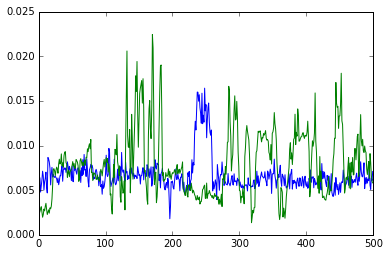

In [75]:
plt.plot(allf['diff_x'][0][0:500])
plt.hold()
plt.plot(allf['diff_x'][0][ind[0]:ind[0]+500],'g')
#plt.hold()
#plt.plot(allf['diff_x'][0][ind[1]:ind[1]+500],'y')
#plt.hold()